In [1]:
pip install praw

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import praw
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
from prawcore.exceptions import Redirect, NotFound, Forbidden
import nltk
import time

In [3]:
nltk.download('vader_lexicon')


reddit = praw.Reddit(
    client_id="7UGlu5JAAeduRsVzIamDag",
    client_secret="MqPgP6Ep6WHhYvQ10D6DPA7XPI6rlg",
    user_agent="MyRedditScraper/1.0 by missingsungjin",
    username="missingsungjin",
    password="Sungjin1!"
)

analyzer = SentimentIntensityAnalyzer()

subreddits = ["coinbase", "cryptocurrency", "CoinbaseInvestors"]
keyword = "coinbase"
min_posts_per_subreddit = 500
all_posts = []

for sub in subreddits:
    try:
        subreddit = reddit.subreddit(sub)
        print(f"Scraping: r/{sub} ...")

        posts = []
        for post in subreddit.hot(limit=1000):
            if keyword.lower() in post.title.lower() or keyword.lower() in post.selftext.lower():
                text = post.title + " " + post.selftext
                sentiment = analyzer.polarity_scores(text)

                posts.append({
                    "subreddit": sub,
                    "title": post.title,
                    "upvotes": post.score,
                    "url": post.url,
                    "date": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                    "compound_sentiment": sentiment["compound"],
                    "positive": sentiment["pos"],
                    "negative": sentiment["neg"],
                    "neutral": sentiment["neu"]
                })

        posts = sorted(posts, key=lambda x: x["upvotes"], reverse=True)[:min_posts_per_subreddit]

        all_posts.extend(posts)

        print(f"Collected {len(posts)} posts from r/{sub}")

        time.sleep(2)

    except Exception as e:
        print(f"Error with subreddit {sub}: {e}")
        continue

df = pd.DataFrame(all_posts)
df.to_csv("coinbase_reddit_sentiment.csv", index=False)

print("Data saved to coinbase_reddit_sentiment.csv")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Scraping: r/coinbase ...
Collected 500 posts from r/coinbase
Scraping: r/cryptocurrency ...
Collected 10 posts from r/cryptocurrency
Scraping: r/CoinbaseInvestors ...
Collected 361 posts from r/CoinbaseInvestors
Data saved to coinbase_reddit_sentiment.csv


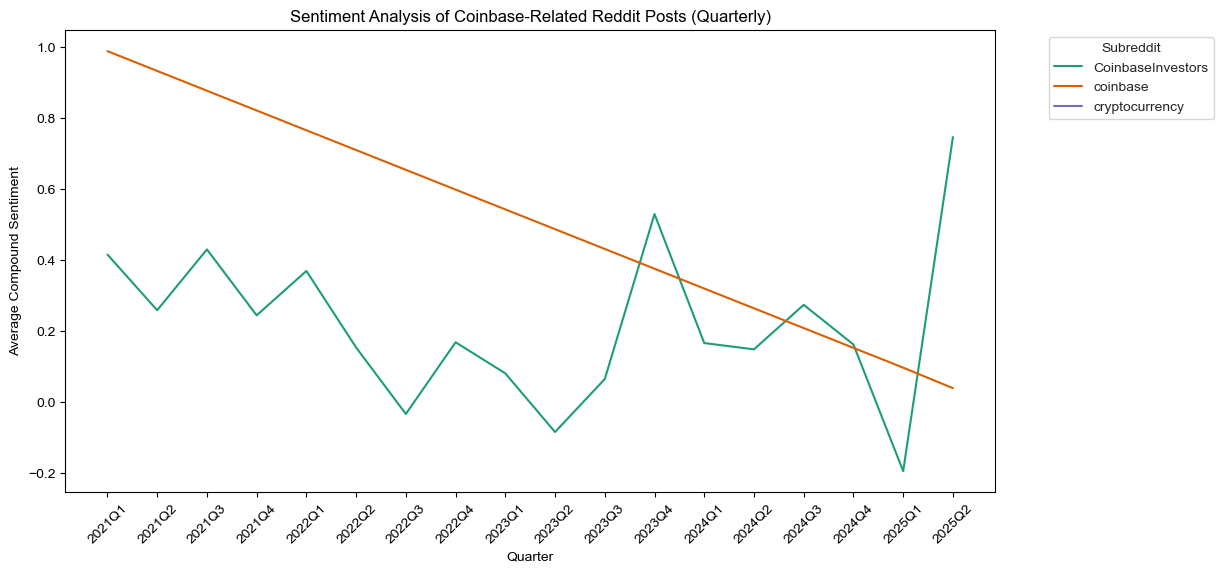

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("coinbase_reddit_sentiment.csv")

# Convert quarter to string for plotting
df['quarter'] = pd.to_datetime(df['date']).dt.to_period('Q')
df_grouped = df.groupby(['quarter', 'subreddit'])['compound_sentiment'].mean().reset_index()
df_grouped['quarter'] = df_grouped['quarter'].astype(str)

# Plot sentiment trend over time by quarter
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("whitegrid")

# Define a color palette
palette = list(sns.color_palette("Dark2", len(df_grouped['subreddit'].unique())))

# Plot each subreddit separately
for i, (series_name, series) in enumerate(df_grouped.groupby('subreddit')):
    plt.plot(series['quarter'], series['compound_sentiment'], label=series_name, color=palette[i])

# Format the plot
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Average Compound Sentiment")
plt.title("Sentiment Analysis of Coinbase-Related Reddit Posts (Quarterly)")
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
print(df['subreddit'].value_counts())

subreddit
coinbase             500
CoinbaseInvestors    361
cryptocurrency        10
Name: count, dtype: int64


In [6]:
import praw
import pandas as pd
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
import time


reddit = praw.Reddit(
    client_id="7UGlu5JAAeduRsVzIamDag",
    client_secret="MqPgP6Ep6WHhYvQ10D6DPA7XPI6rlg",
    user_agent="MyRedditScraper/1.0 by missingsungjin",
    username="missingsungjin",
    password="Sungjin1!"
)

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define subreddits and keyword
subreddits = ["coinbase", "cryptocurrency", "CoinbaseInvestors"]
keyword = "coinbase"
years = range(2021, datetime.now().year + 1)

# Data storage
all_posts = []

# Scraping loop
for sub in subreddits:
    for year in years:
        try:
            print(f"Fetching 100 posts from r/{sub} for {year} ...")
            subreddit = reddit.subreddit(sub)

            posts = []
            for post in subreddit.top(time_filter="year", limit=1000):
                if keyword.lower() in post.title.lower() or keyword.lower() in post.selftext.lower():
                    text = post.title + " " + post.selftext
                    sentiment = analyzer.polarity_scores(text)

                    posts.append({
                        "subreddit": sub,
                        "title": post.title,
                        "upvotes": post.score,
                        "url": post.url,
                        "date": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                        "year": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')[:4],
                        "compound_sentiment": sentiment["compound"],
                        "positive": sentiment["pos"],
                        "negative": sentiment["neg"],
                        "neutral": sentiment["neu"]
                    })

            posts = sorted(posts, key=lambda x: x["upvotes"], reverse=True)[:500]
            all_posts.extend(posts)

            print(f"Collected {len(posts)} posts from r/{sub} for {year}")

            time.sleep(2)

        except Exception as e:
            print(f"Error with r/{sub} for {year}: {e}")
            continue

# Save data to CSV
df = pd.DataFrame(all_posts)
df.to_csv("coinbase_reddit_sentiment.csv", index=False)

print("Data saved to coinbase_reddit_sentiment.csv")
df.head(50)

Fetching 100 posts from r/coinbase for 2021 ...
Collected 500 posts from r/coinbase for 2021
Fetching 100 posts from r/coinbase for 2022 ...
Collected 500 posts from r/coinbase for 2022
Fetching 100 posts from r/coinbase for 2023 ...
Collected 500 posts from r/coinbase for 2023
Fetching 100 posts from r/coinbase for 2024 ...
Collected 500 posts from r/coinbase for 2024
Fetching 100 posts from r/coinbase for 2025 ...
Collected 500 posts from r/coinbase for 2025
Fetching 100 posts from r/cryptocurrency for 2021 ...
Collected 38 posts from r/cryptocurrency for 2021
Fetching 100 posts from r/cryptocurrency for 2022 ...
Collected 38 posts from r/cryptocurrency for 2022
Fetching 100 posts from r/cryptocurrency for 2023 ...
Collected 38 posts from r/cryptocurrency for 2023
Fetching 100 posts from r/cryptocurrency for 2024 ...
Collected 38 posts from r/cryptocurrency for 2024
Fetching 100 posts from r/cryptocurrency for 2025 ...
Collected 38 posts from r/cryptocurrency for 2025
Fetching 100 po

,subreddit,title,upvotes,url,date,year,compound_sentiment,positive,negative,neutral
0,coinbase,"I got scammed out of 147,592$ worth of ETH",1304,https://www.reddit.com/r/CoinBase/comments/1hf...,2024-12-16 12:35:36,2024,0.8389,0.114,0.085,0.801
1,coinbase,Got scammed on Coinbase and lost 41 ETH ($166k!),1064,https://www.reddit.com/r/CoinBase/comments/1hd...,2024-12-13 20:09:44,2024,-0.9928,0.084,0.114,0.803
2,coinbase,Let's Bring $PEP to Coinbase! 🚀,616,https://www.reddit.com/r/CoinBase/comments/1hb...,2024-12-11 12:50:08,2024,0.9940,0.216,0.005,0.779
3,coinbase,I STRONGLY suggest that you get rid of your as...,577,https://www.reddit.com/r/CoinBase/comments/1cq...,2024-05-12 20:43:10,2024,0.4506,0.117,0.109,0.774
4,coinbase,Coinbase pretty much stole my btc.,525,https://www.reddit.com/r/CoinBase/comments/1gy...,2024-11-23 14:37:08,2024,0.7963,0.106,0.091,0.804
5,coinbase,Account w/ 200k+ Still Locked. Setting Up A Cl...,484,https://www.reddit.com/r/CoinBase/comments/1d9...,2024-06-05 22:33:36,2024,-0.8259,0.037,0.099,0.865
6,coinbase,Account Restricted With $1.88M USD (been 40 days),412,https://www.reddit.com/r/CoinBase/comments/1g1...,2024-10-11 11:34:44,2024,-0.9455,0.037,0.135,0.829
7,coinbase,6 month nightmare still going...,386,https://www.reddit.com/r/CoinBase/comments/1gw...,2024-11-21 12:11:12,2024,0.9326,0.139,0.087,0.774
8,coinbase,Celebrating 3 YEARS of having my account under...,368,https://www.reddit.com/r/CoinBase/comments/1h0...,2024-11-26 12:20:36,2024,-0.6798,0.136,0.239,0.625
9,coinbase,Account with 200k+ still closed. At the end of...,337,https://www.reddit.com/r/CoinBase/comments/1d4...,2024-05-31 15:34:13,2024,-0.7698,0.116,0.152,0.732


In [7]:
print(df['year'].value_counts())

year
2024    3030
Name: count, dtype: int64


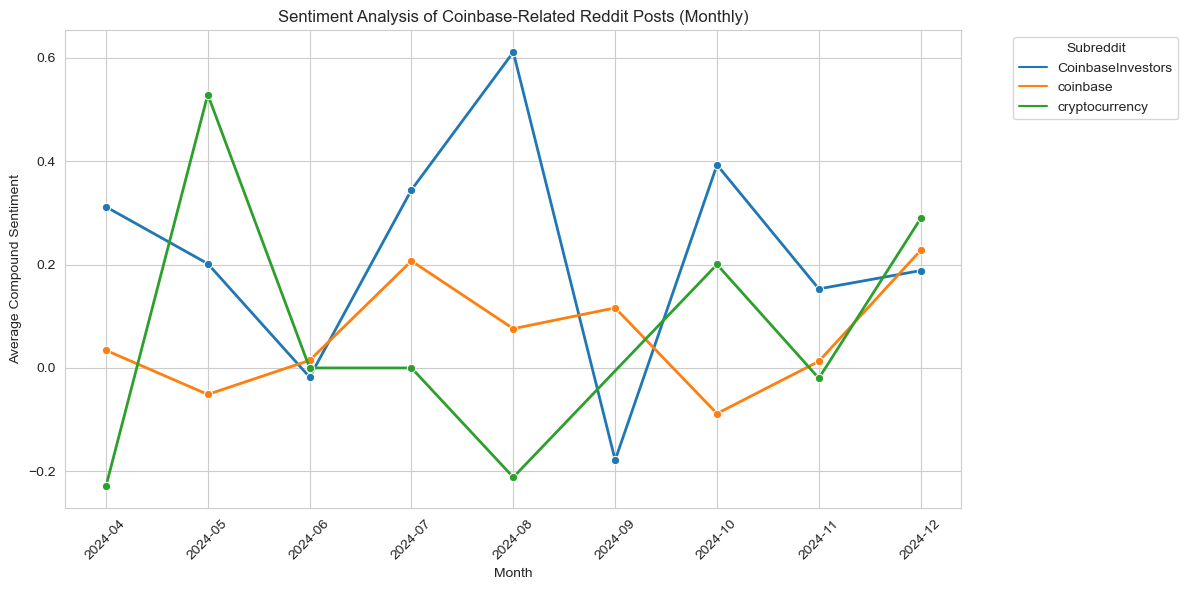

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("coinbase_reddit_sentiment.csv")
df['date'] = pd.to_datetime(df['date'])  # <-- this is the fix!
df['month'] = df['date'].dt.to_period('M').astype(str)

# Group by month and subreddit, then compute mean sentiment
df_grouped = df.groupby(['month', 'subreddit'])['compound_sentiment'].mean().reset_index()
df_grouped = df_grouped.sort_values(by="month")

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(
    data=df_grouped,
    x="month",
    y="compound_sentiment",
    hue="subreddit",
    marker="o",
    linewidth=2,
    markersize=6
)

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Average Compound Sentiment")
plt.title("Sentiment Analysis of Coinbase-Related Reddit Posts (Monthly)")
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
!pip install transformers torch

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from transformers import pipeline
import pandas as pd

# Load the scraped Reddit data
df = pd.read_csv("coinbase_reddit_sentiment.csv")

# Load RoBERTa sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Function to classify sentiment using RoBERTa
def classify_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral"  # Handle missing text
    result = sentiment_pipeline(text)[0]
    return result["label"]  # Outputs "positive", "neutral", or "negative"

# Apply RoBERTa sentiment analysis
df["RoBERTa_Sentiment"] = df["title"].apply(classify_sentiment)

# Save updated dataset
df.to_csv("coinbase_reddit_with_roberta_sentiment.csv", index=False)

# Display sample output
df[["title", "RoBERTa_Sentiment"]].head()

Device set to use cpu


,title,RoBERTa_Sentiment
0,"I got scammed out of 147,592$ worth of ETH",LABEL_0
1,Got scammed on Coinbase and lost 41 ETH ($166k!),LABEL_0
2,Let's Bring $PEP to Coinbase! 🚀,LABEL_2
3,I STRONGLY suggest that you get rid of your as...,LABEL_0
4,Coinbase pretty much stole my btc.,LABEL_0


In [12]:
label_mapping = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

# Apply the mapping
df["RoBERTa_Sentiment"] = df["RoBERTa_Sentiment"].map(label_mapping)

# Show updated results
df[["title", "RoBERTa_Sentiment"]].head()

,title,RoBERTa_Sentiment
0,"I got scammed out of 147,592$ worth of ETH",Negative
1,Got scammed on Coinbase and lost 41 ETH ($166k!),Negative
2,Let's Bring $PEP to Coinbase! 🚀,Positive
3,I STRONGLY suggest that you get rid of your as...,Negative
4,Coinbase pretty much stole my btc.,Negative


In [13]:
df["RoBERTa_Sentiment"].value_counts()

RoBERTa_Sentiment
Neutral     1608
Negative    1275
Positive     147
Name: count, dtype: int64

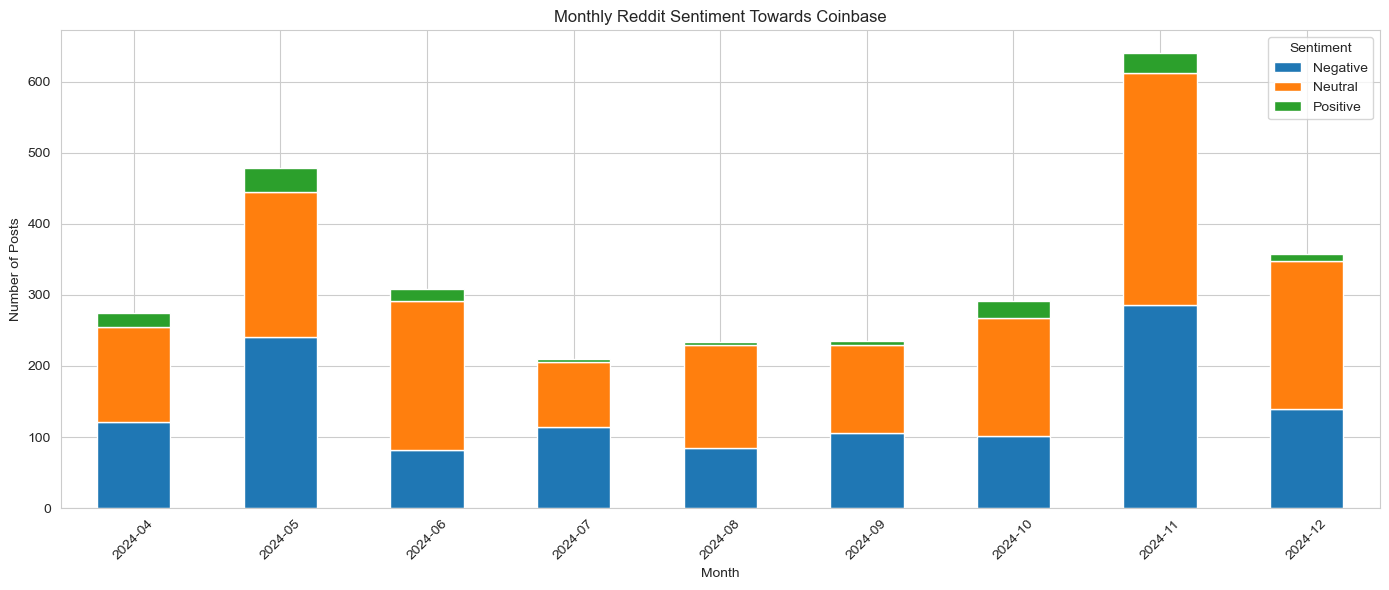

In [14]:
import matplotlib.pyplot as plt

# Ensure date is in datetime format
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)

# Count sentiment per month
sentiment_trends = df.groupby(["month", "RoBERTa_Sentiment"]).size().unstack()

# Plot sentiment trends
sentiment_trends.plot(kind="bar", figsize=(14, 6), stacked=True)
plt.title("Monthly Reddit Sentiment Towards Coinbase")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()